In [79]:
#IMPORTAR LAS LIBRERIAS CORRESPONDIENTES 
#Manipulación y tratamiento de datos
import pandas as pd
import numpy as np

#Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns

#Normalización o estandarización de datos
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Modelación con cluster y reducción de dimesionalidad
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [80]:
#Cargado de Datos
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [82]:
train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [83]:
test.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [84]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [85]:
train.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
test.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)

In [86]:
#VISUALIZACIÓN DE LOS DATOS
sns.set_theme(style = 'whitegrid')

In [87]:
df = pd.concat([train, test])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    129880 non

C:\Users\qchuc\AppData\Local\Temp\ipykernel_23824\2876882795.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'satisfaction', data = df, palette = "Set1")


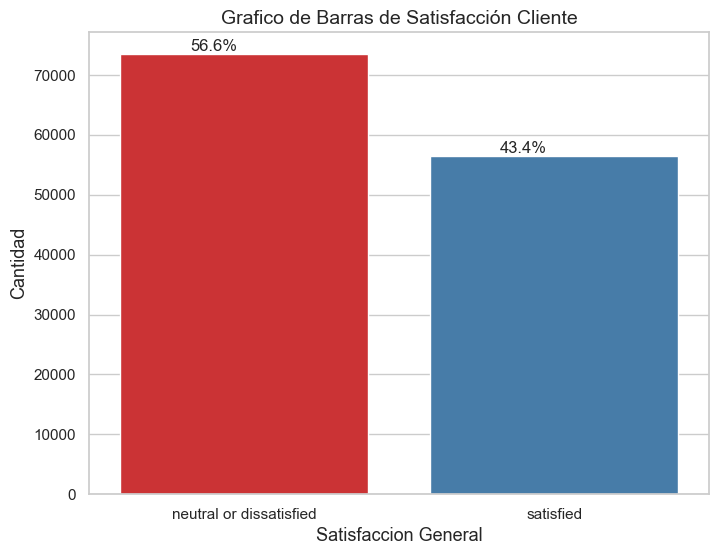

In [88]:
#1. ¿Cuál es el nivel general de satisfacción de los pasajeros?
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'satisfaction', data = df, palette = "Set1")
plt.title('Grafico de Barras de Satisfacción Cliente', fontsize = 14)
plt.xlabel('Satisfaccion General', fontsize=13)
plt.ylabel('Cantidad', fontsize=13)
# Añadir descripción
total = len(df['satisfaction'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

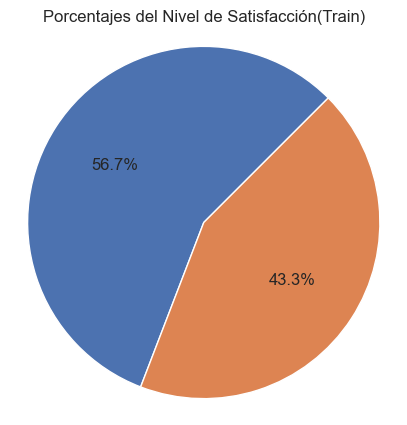

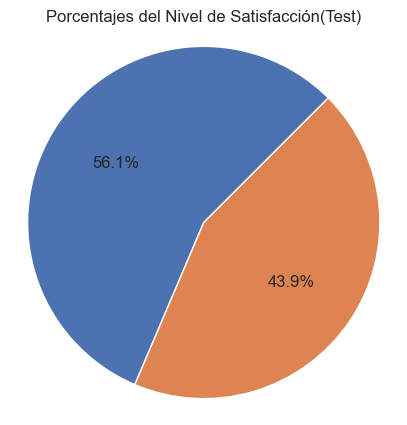

In [89]:
#1.1 ¿cuáles son los porcentajes?
#train.csv
satisfaction_percent = train['satisfaction'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 5))
plt.pie(satisfaction_percent, autopct='%1.1f%%', startangle=45)
plt.title('Porcentajes del Nivel de Satisfacción(Train)')
plt.axis('equal') 
plt.show()

#test.csv
satisfaction_percent_test = test['satisfaction'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 5))
plt.pie(satisfaction_percent_test, autopct='%1.1f%%', startangle=45)
plt.title('Porcentajes del Nivel de Satisfacción(Test)')
plt.axis('equal') 
plt.show()

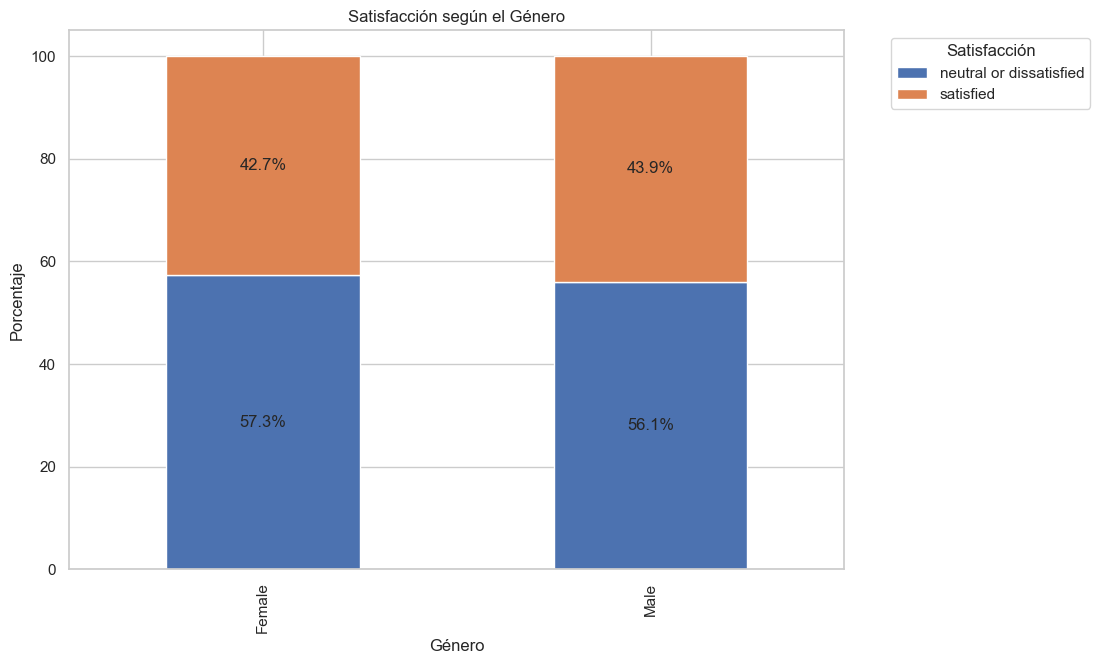

In [90]:
# 2. ¿Cómo varía la satisfacción según el género de los pasajeros?
satisfaction_by_gender = train.groupby('Gender')['satisfaction'].value_counts(normalize=True).unstack() * 100

# Crear el gráfico de barras apiladas
ax = satisfaction_by_gender.plot(kind='bar', stacked=True, figsize=(10,7))

# Agregar descripción de los porcentajes en cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

# Configuración del gráfico
plt.title('Satisfacción según el Género')
plt.xlabel('Género')
plt.ylabel('Porcentaje')
plt.legend(title='Satisfacción', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

<Figure size 1200x800 with 0 Axes>

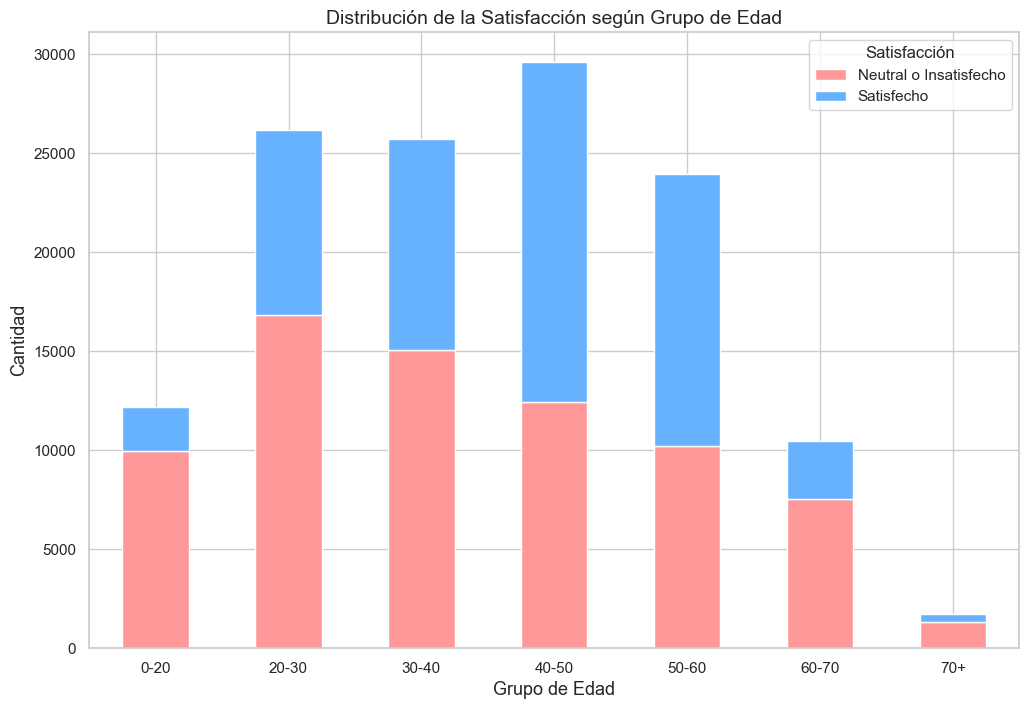

In [91]:
# 3. ¿Hay diferencias significativas según el grupo de edad?
df['Age'] = df['Age'].replace([np.inf, -np.inf], np.nan)

# Definir los rangos de edad
bins = [0, 20, 30, 40, 50, 60, 70, 120]
labels_age = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']

# Crear una nueva columna con los rangos de edad
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels_age, right=False)

# Convertir a cadenas de texto
df['Age Group'] = df['Age Group'].astype(str)

# Obtener el conteo de satisfacción por grupo de edad y tipo de viaje
age_satisfaction_counts = df.groupby(['Age Group', 'satisfaction']).size().unstack()

# Graficar la distribución de la satisfacción según los rangos de edad
plt.figure(figsize=(12, 8))
age_satisfaction_counts.plot(kind='bar', stacked=True, color=["#FF9999", "#66B2FF"], figsize=(12, 8))
plt.title('Distribución de la Satisfacción según Grupo de Edad', fontsize=14)
plt.xlabel('Grupo de Edad', fontsize=13)
plt.ylabel('Cantidad', fontsize=13)
plt.legend(title='Satisfacción', labels=['Neutral o Insatisfecho', 'Satisfecho'], bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()


<Figure size 1000x700 with 0 Axes>

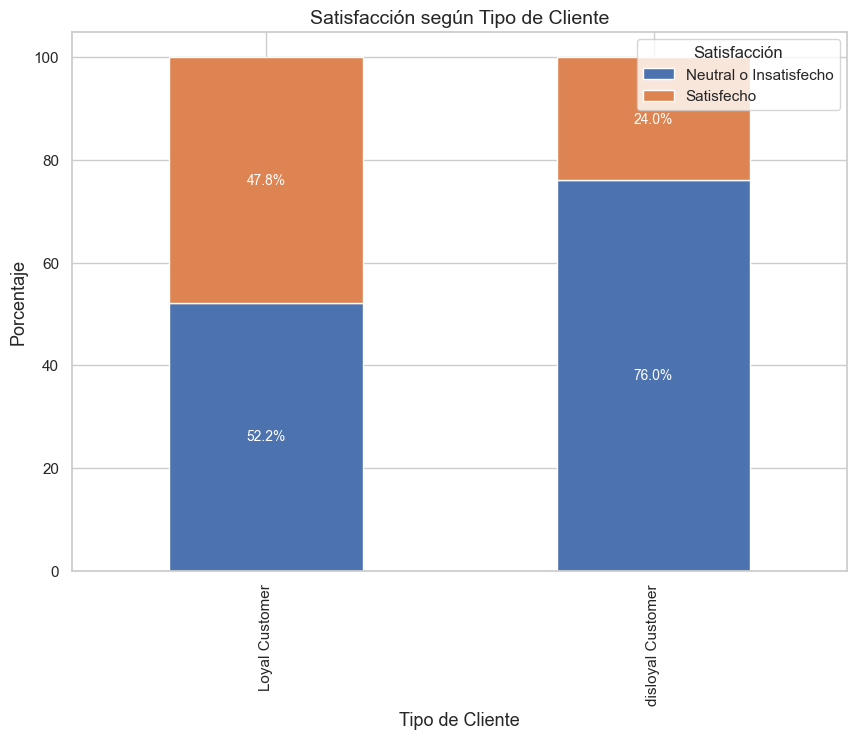

In [92]:
# 4. ¿Qué diferencias existen en la satisfacción entre clientes leales y no leales?
loyalty_satisfaction = df.groupby('Customer Type')['satisfaction'].value_counts(normalize=True).unstack() * 100

# Graficar la satisfacción según el tipo de cliente
plt.figure(figsize=(10, 7))
loyalty_satisfaction.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Satisfacción según Tipo de Cliente', fontsize=14)
plt.xlabel('Tipo de Cliente', fontsize=13)
plt.ylabel('Porcentaje', fontsize=13)

# Agregar etiquetas a las barras
for p in plt.gca().patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white')

plt.legend(title='Satisfacción', labels=['Neutral o Insatisfecho', 'Satisfecho'])
plt.show()

<Figure size 1000x700 with 0 Axes>

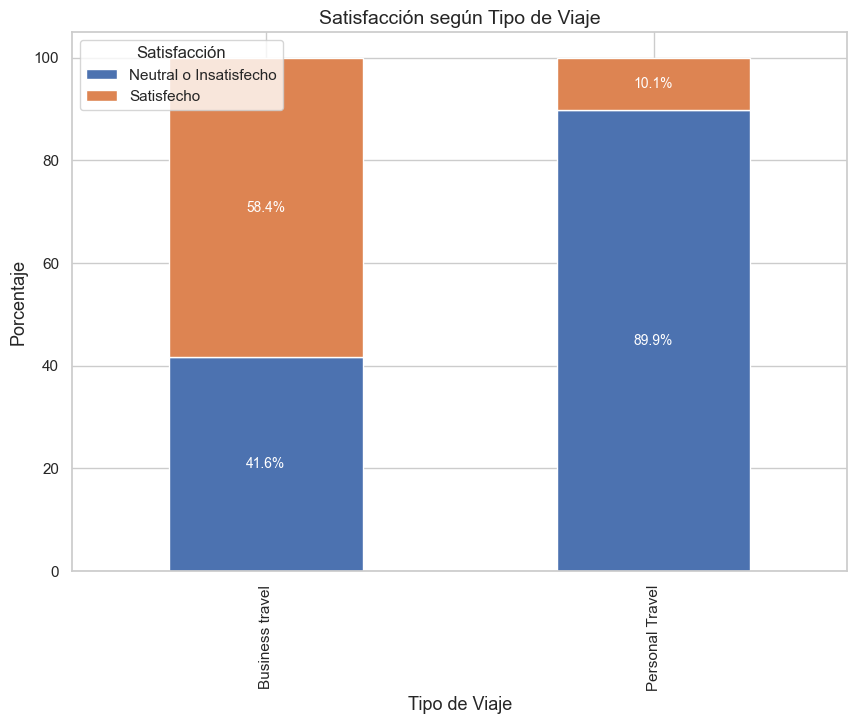

In [93]:
# 5. ¿Cómo afecta el tipo de viaje (Personal vs. de Negocios) la satisfacción del pasajero?
# Obtener el porcentaje de satisfacción por tipo de viaje
trip_satisfaction = df.groupby('Type of Travel')['satisfaction'].value_counts(normalize=True).unstack() * 100

# Graficar la satisfacción según el tipo de viaje
plt.figure(figsize=(10, 7))
trip_satisfaction.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Satisfacción según Tipo de Viaje', fontsize=14)
plt.xlabel('Tipo de Viaje', fontsize=13)
plt.ylabel('Porcentaje', fontsize=13)

# Agregar etiquetas a las barras
for p in plt.gca().patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white')

plt.legend(title='Satisfacción', labels=['Neutral o Insatisfecho', 'Satisfecho'])
plt.show()

satisfaction                         1.000000
Online boarding                      0.501749
Inflight entertainment               0.398234
Seat comfort                         0.348829
On-board service                     0.322205
Leg room service                     0.312424
Cleanliness                          0.307035
Flight Distance                      0.298085
Inflight wifi service                0.283460
Baggage handling                     0.248680
Inflight service                     0.244918
Checkin service                      0.237252
Food and drink                       0.211340
Ease of Online booking               0.168877
Age                                  0.134091
Age Group                            0.132205
Gender                               0.011236
Gate location                       -0.002793
Departure Delay in Minutes          -0.050740
Departure/Arrival time convenient   -0.054270
Arrival Delay in Minutes            -0.058275
Customer Type                     

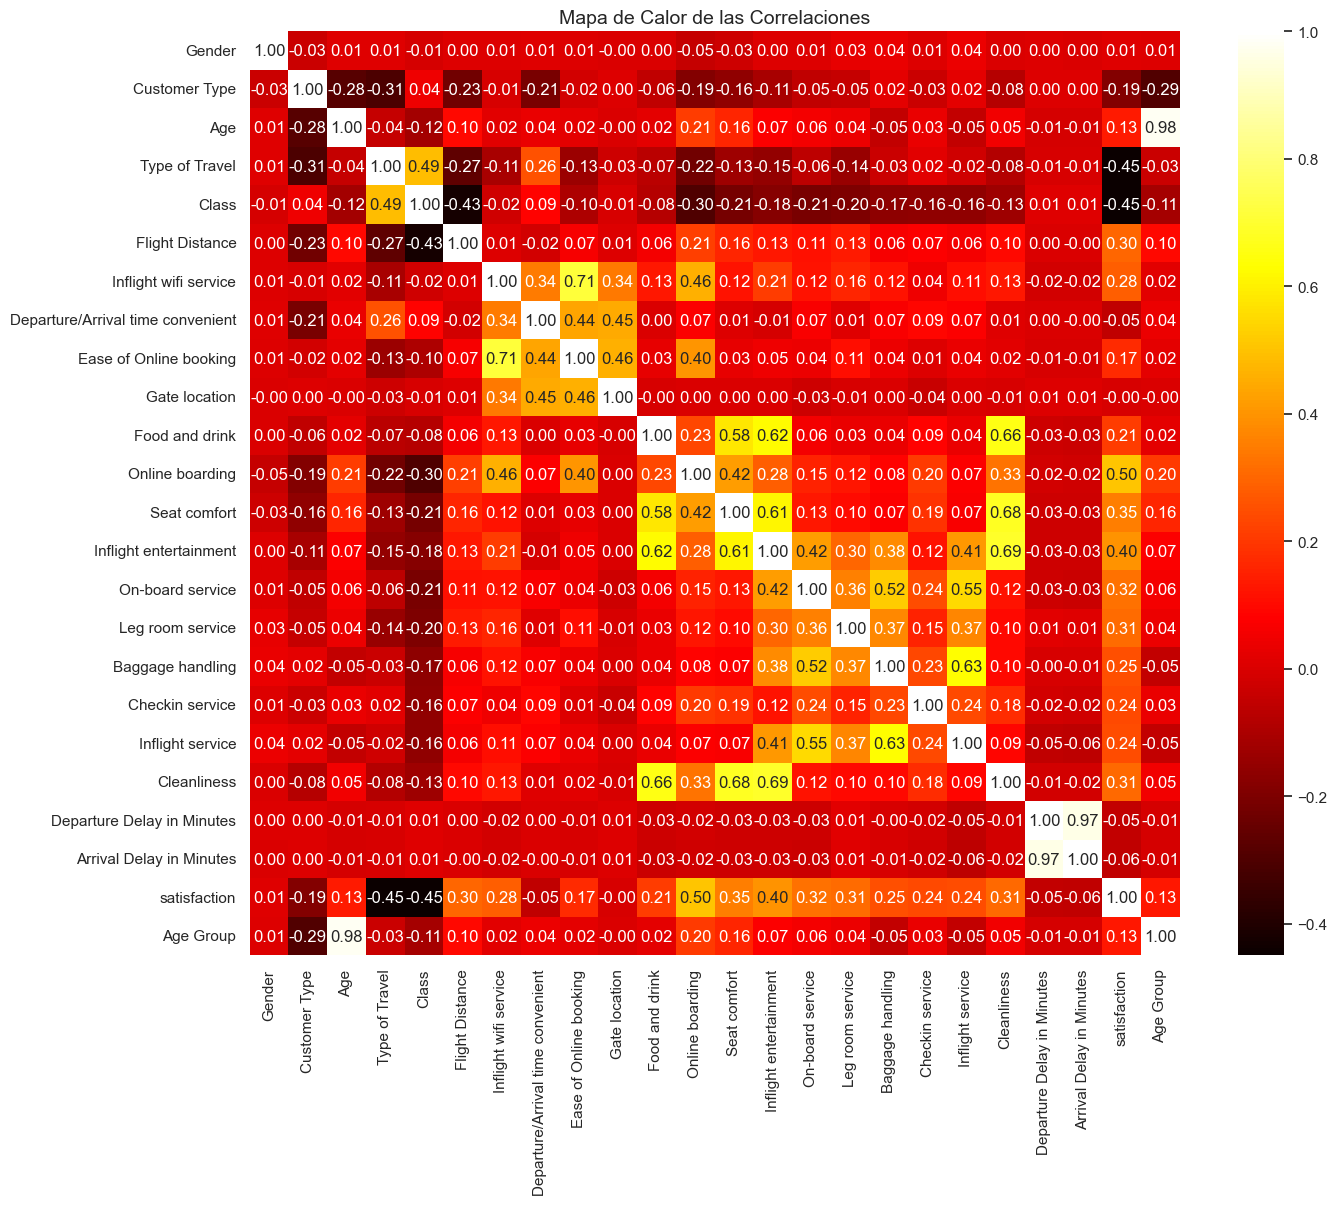

In [94]:
# 6. ¿Qué servicios influyen más en la satisfacción general del pasajero (wifi, entretenimiento a bordo, comodidad del asiento, etc.)?
# Convertir columnas categóricas a valores numéricos
df_encoded = df.copy()
label_encoders = {}

# Codificar todas las columnas categóricas
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

satisfaction_correlations = df_encoded.corr()['satisfaction'].sort_values(ascending=False)
print(satisfaction_correlations)

plt.figure(figsize=(15,12))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='hot')
plt.title('Mapa de Calor de las Correlaciones', fontsize=14)
plt.show()

<Figure size 800x600 with 0 Axes>

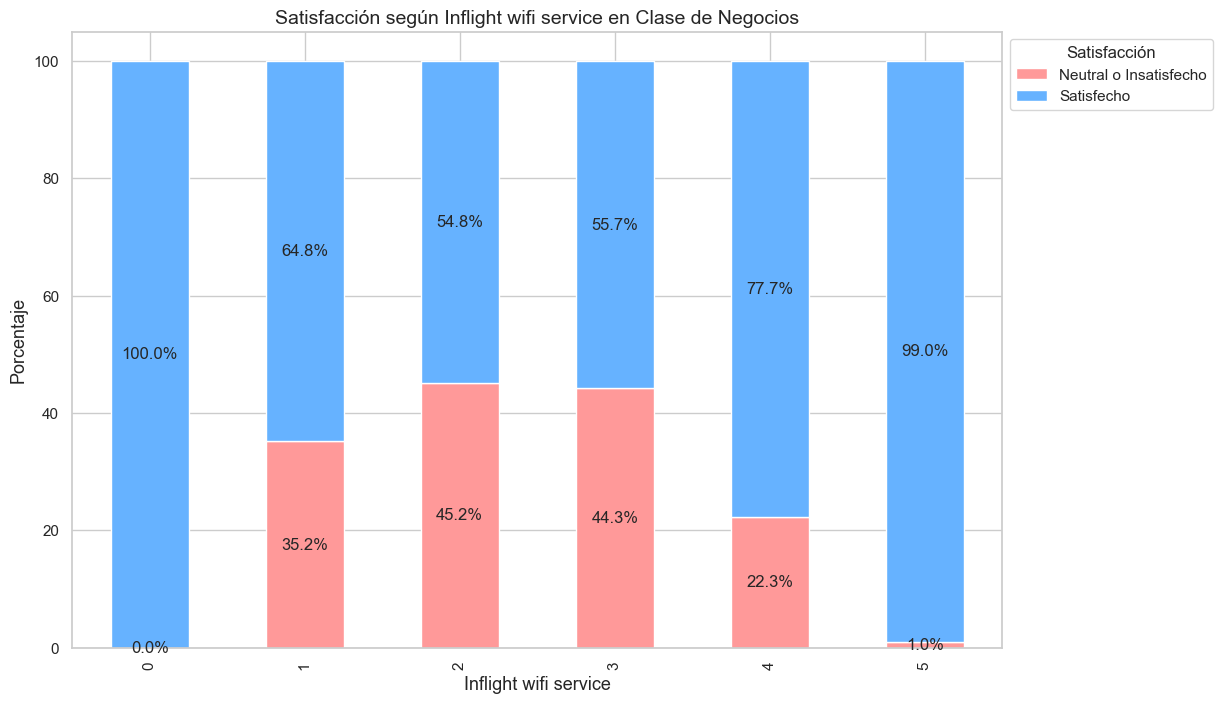

<Figure size 800x600 with 0 Axes>

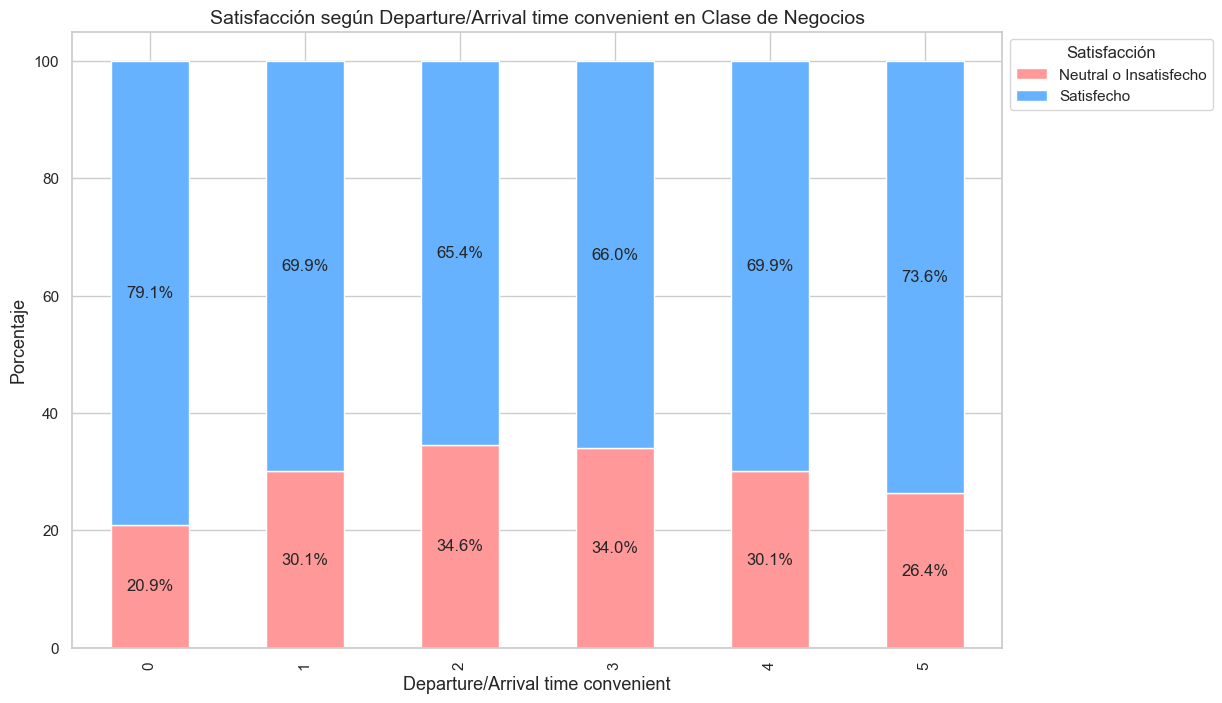

<Figure size 800x600 with 0 Axes>

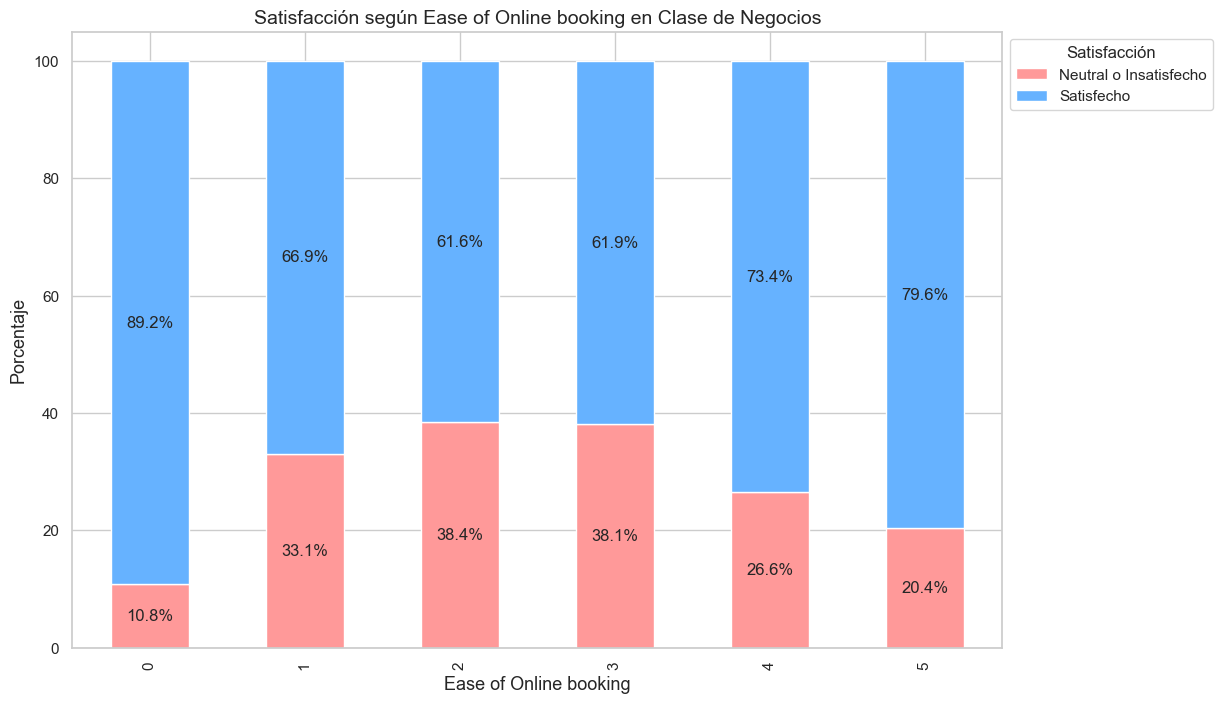

<Figure size 800x600 with 0 Axes>

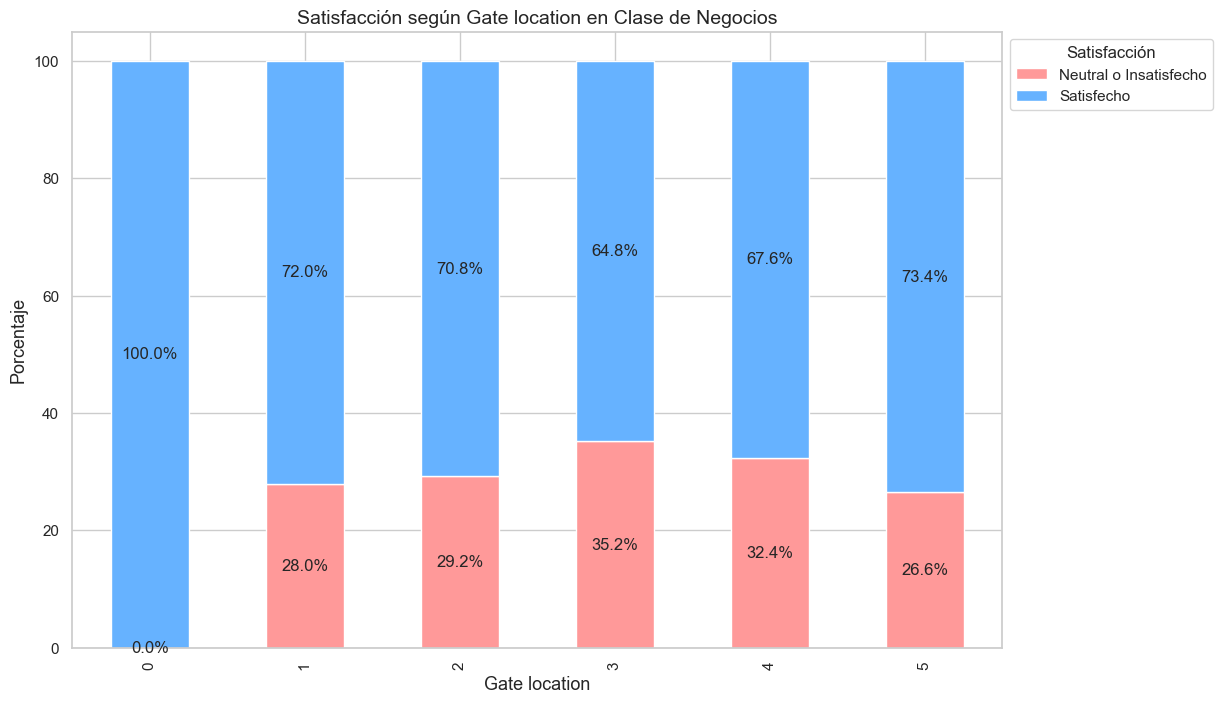

<Figure size 800x600 with 0 Axes>

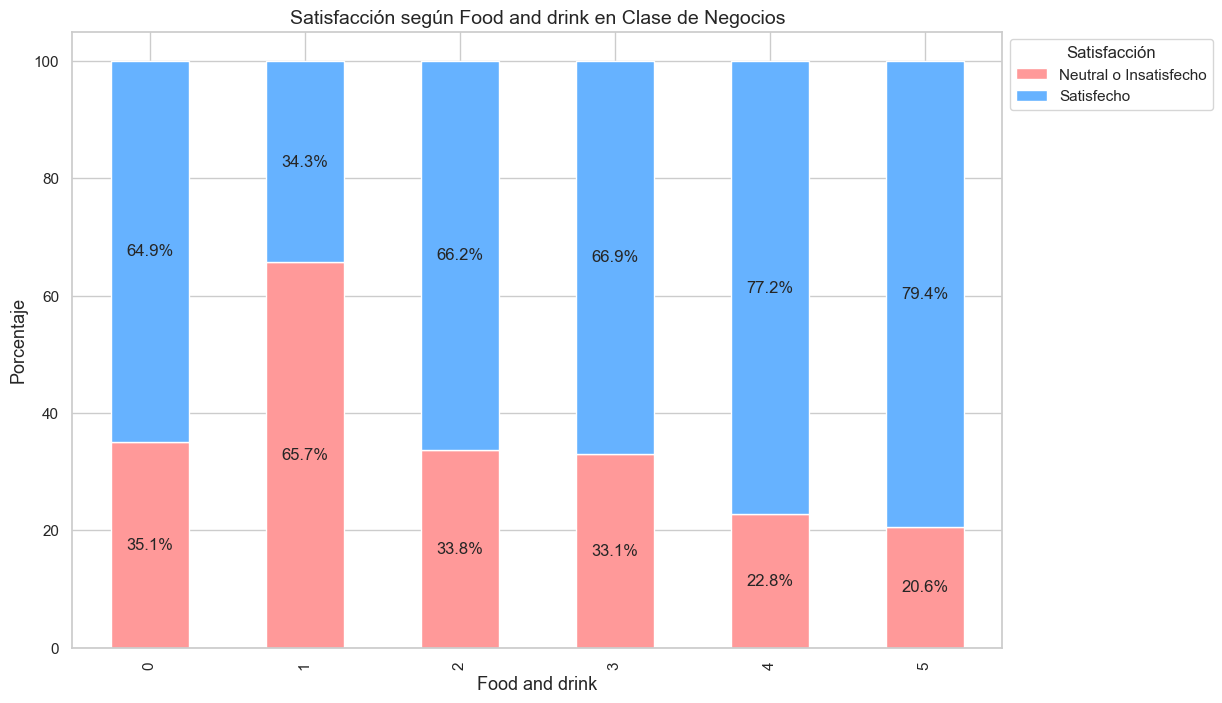

<Figure size 800x600 with 0 Axes>

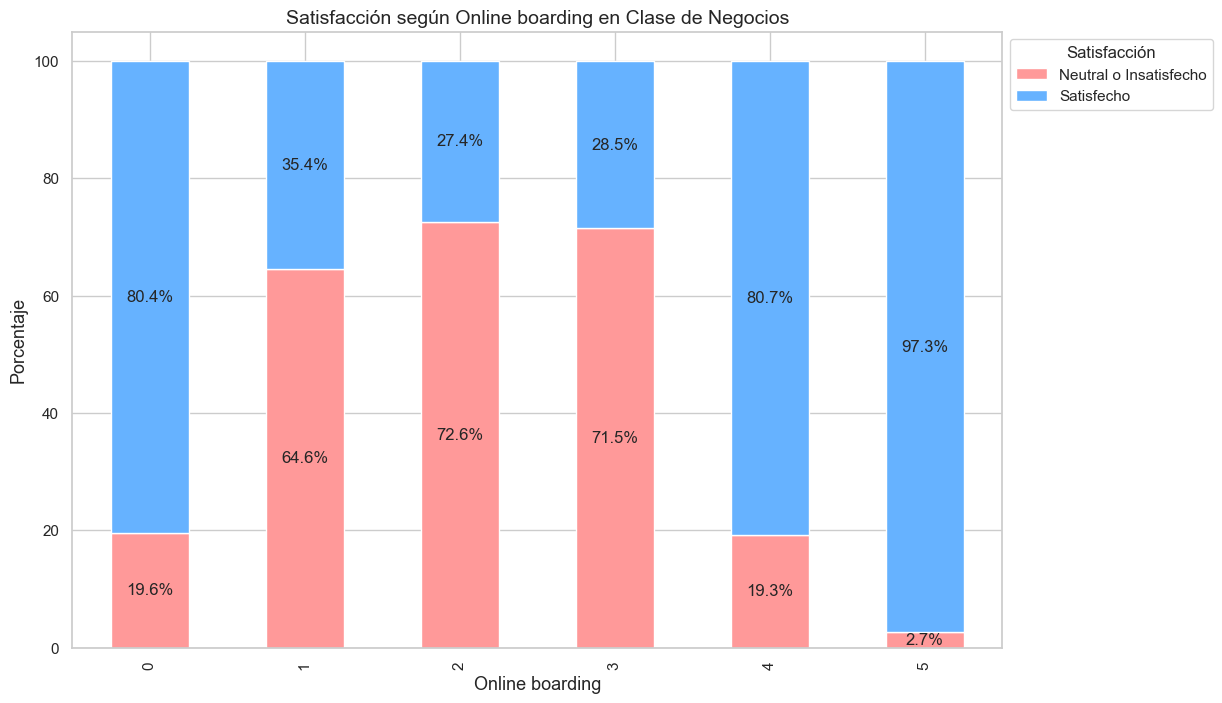

<Figure size 800x600 with 0 Axes>

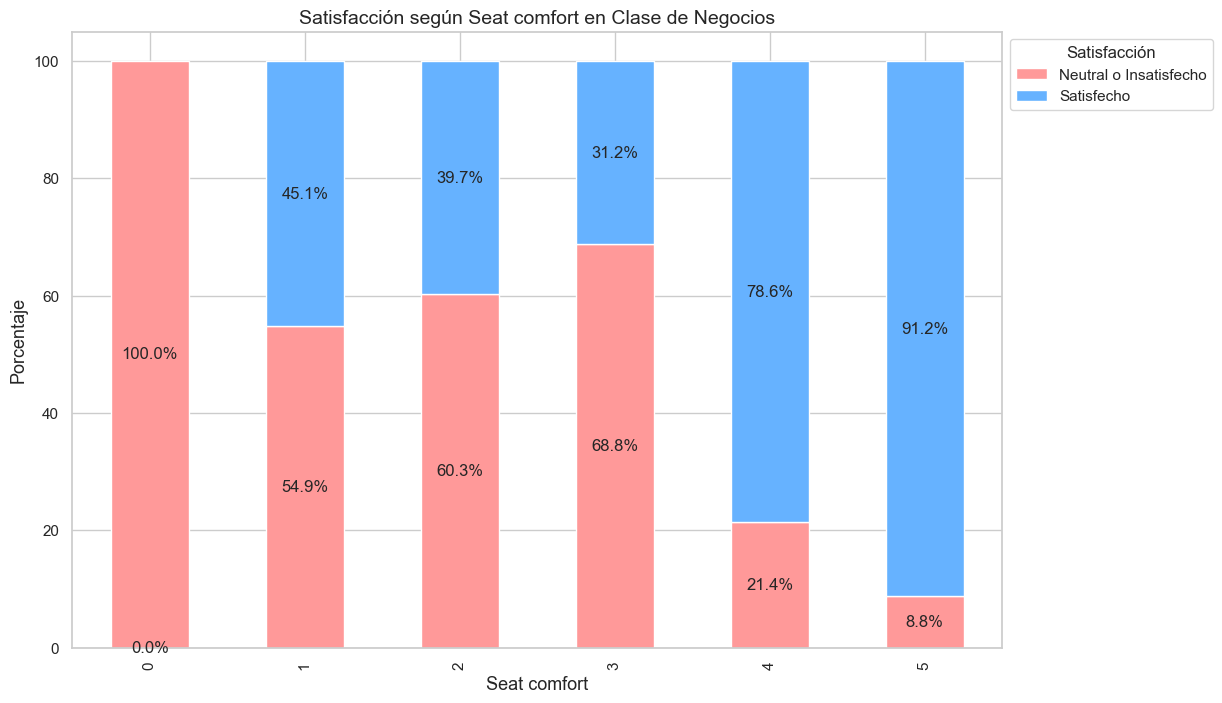

<Figure size 800x600 with 0 Axes>

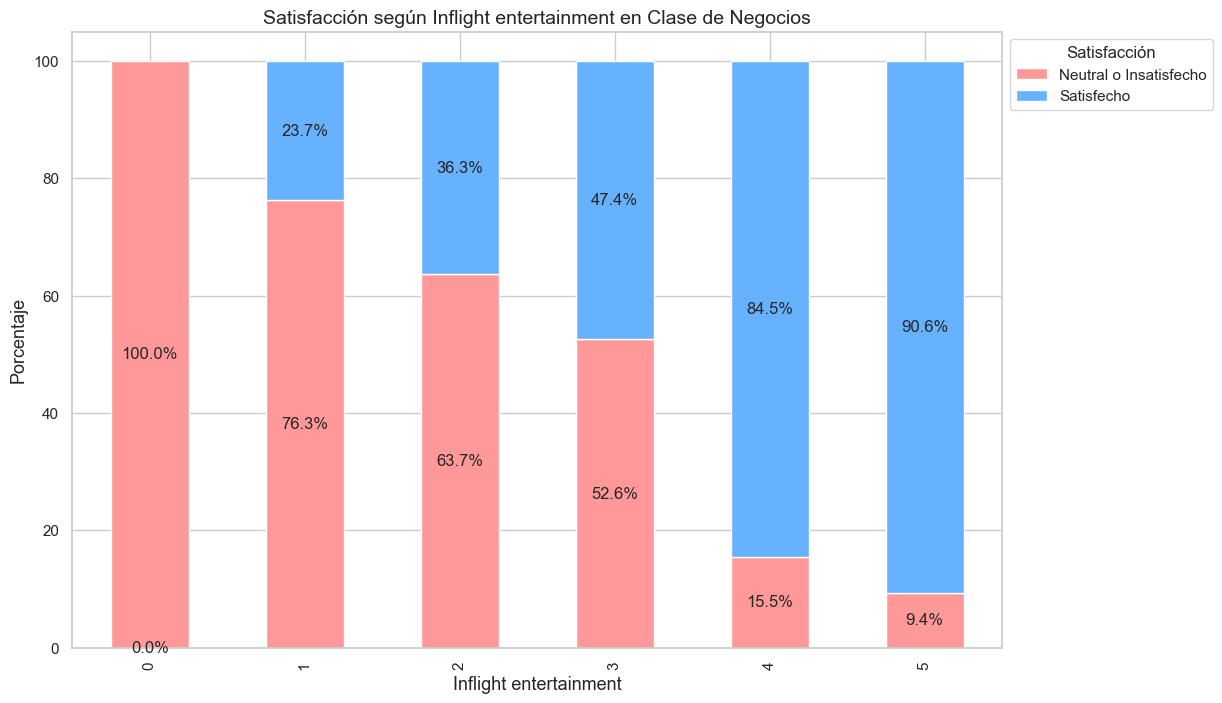

<Figure size 800x600 with 0 Axes>

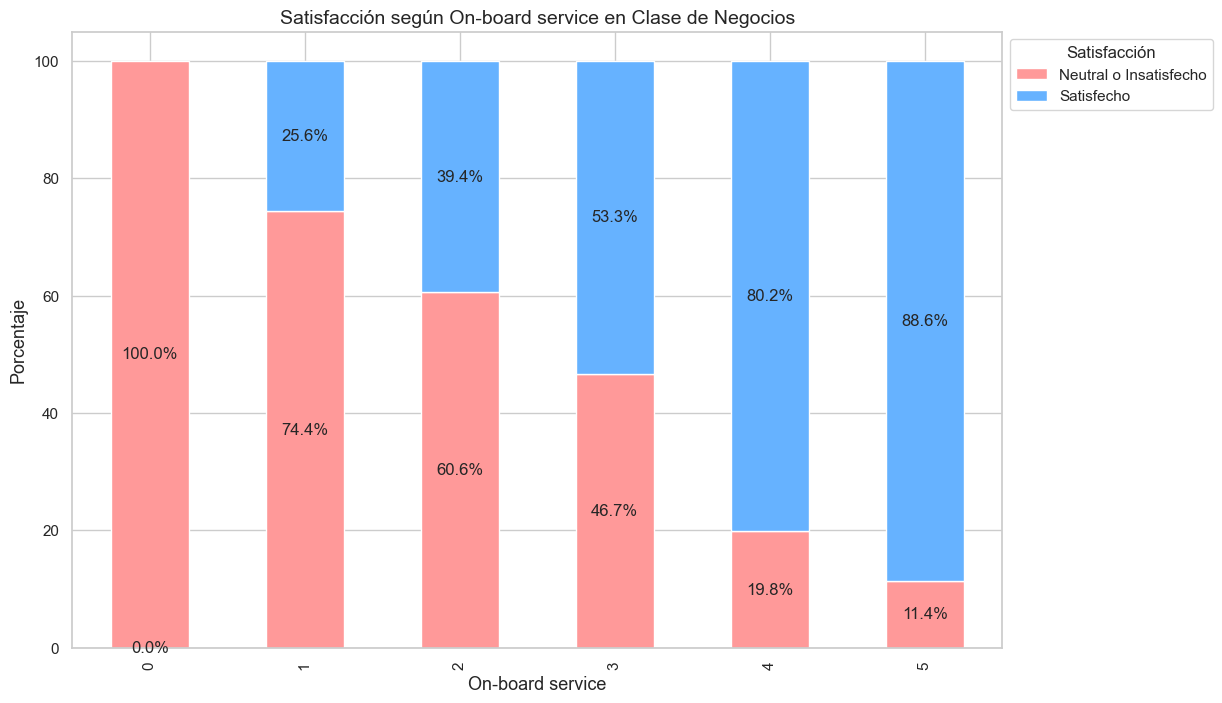

<Figure size 800x600 with 0 Axes>

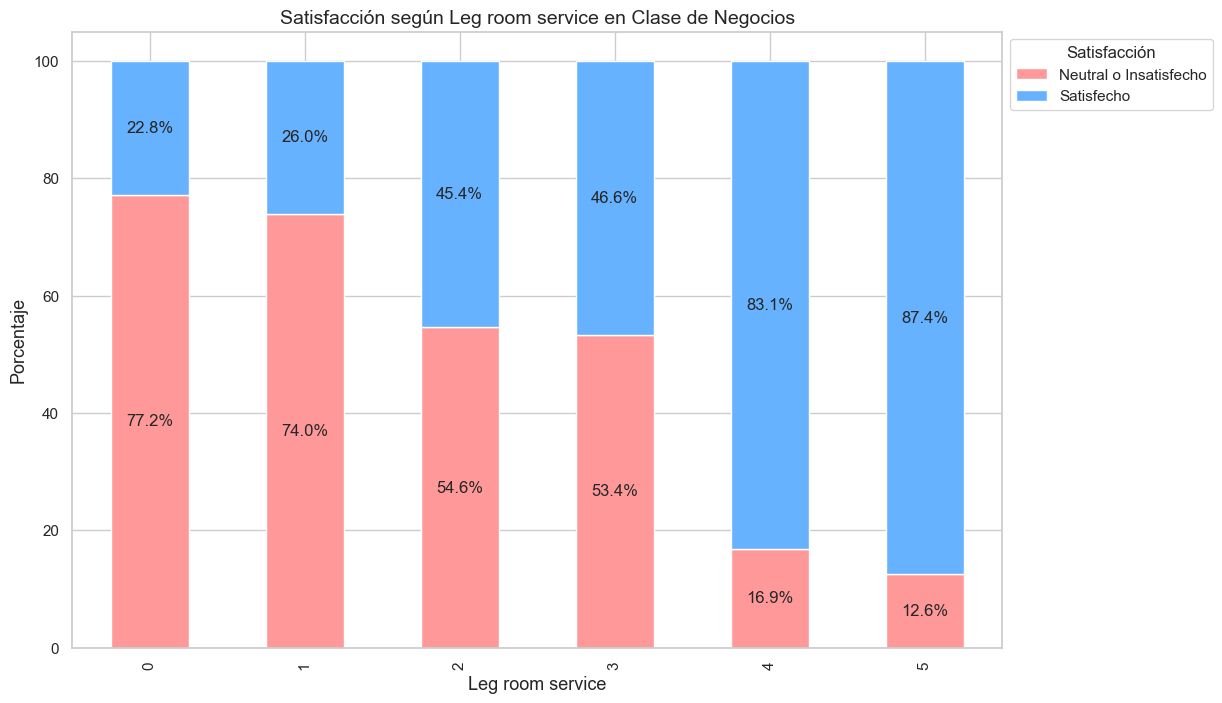

<Figure size 800x600 with 0 Axes>

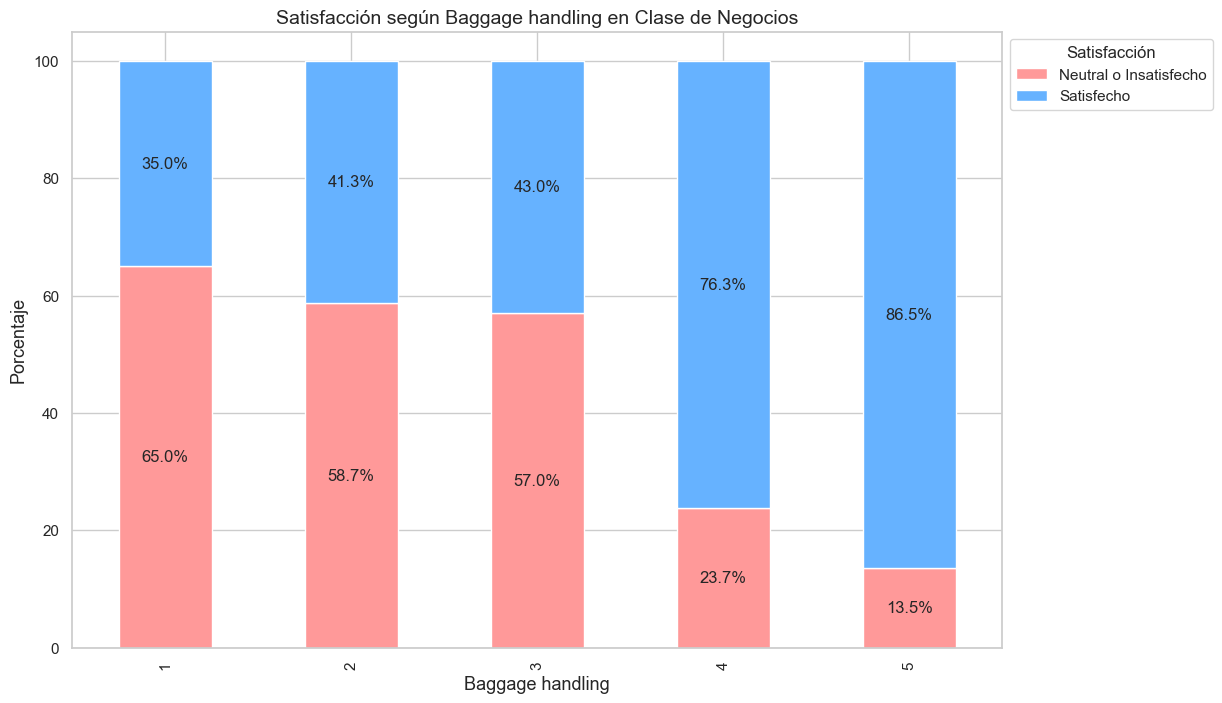

<Figure size 800x600 with 0 Axes>

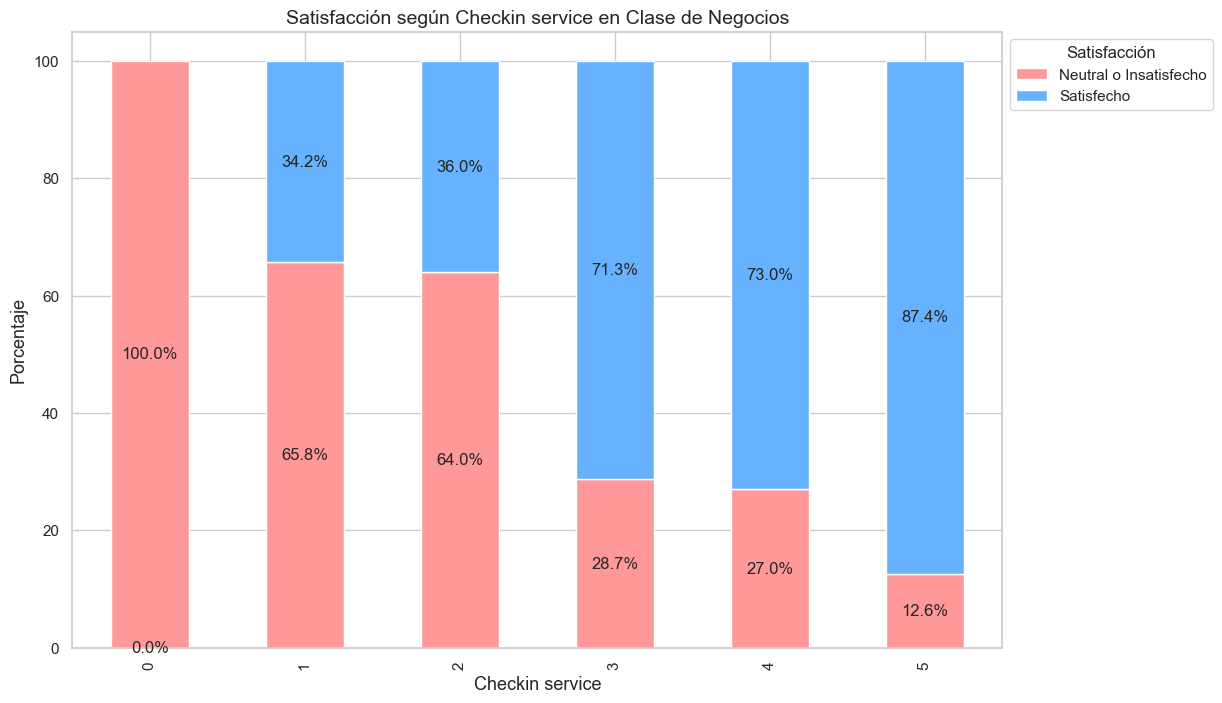

<Figure size 800x600 with 0 Axes>

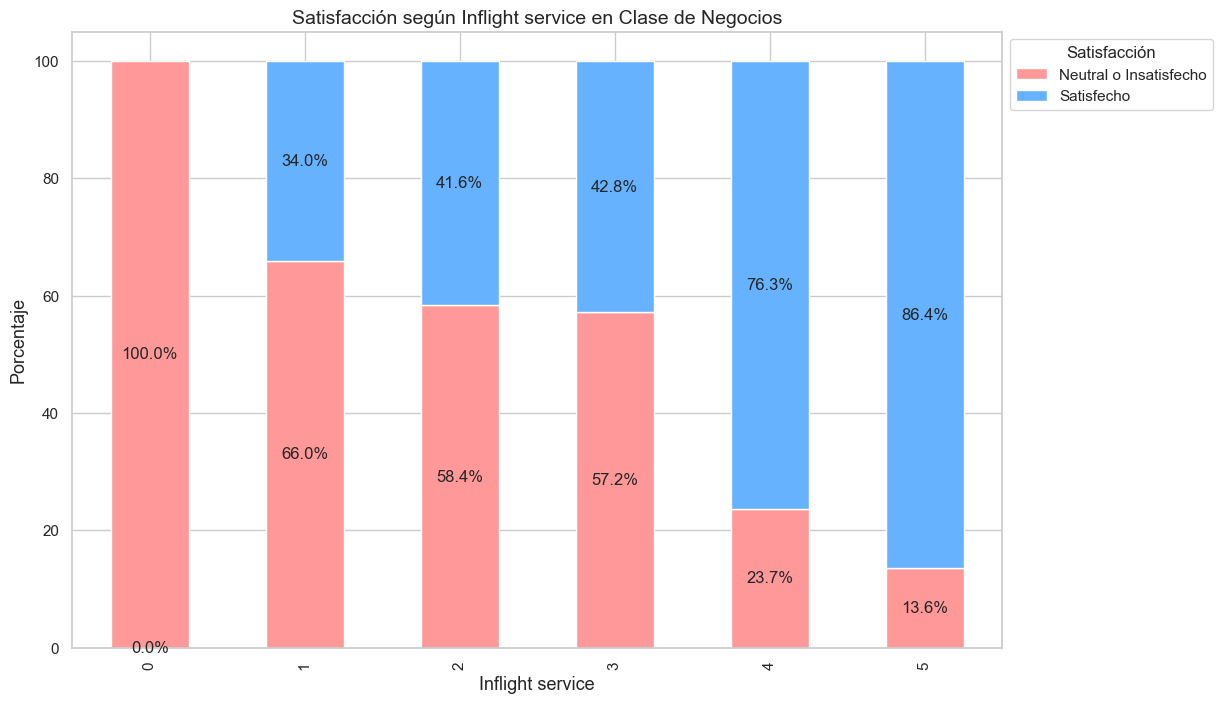

<Figure size 800x600 with 0 Axes>

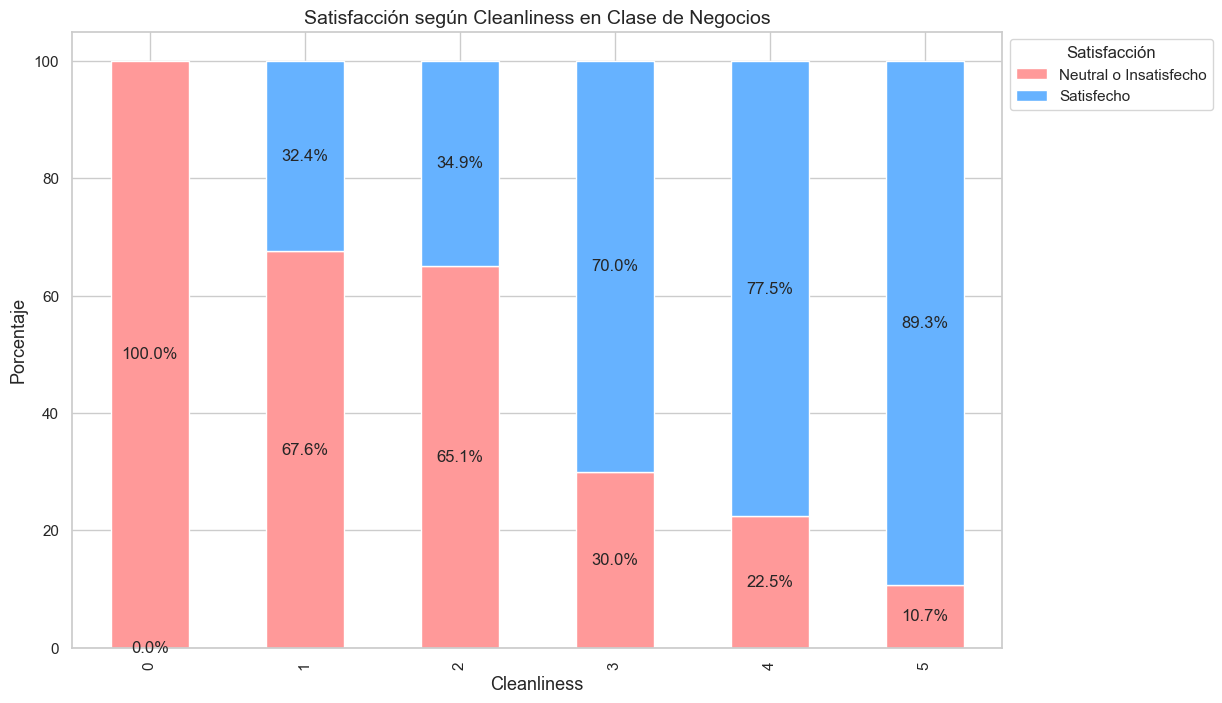

In [95]:
# Convertir la columna 'satisfaction' a tipo categórico
df['satisfaction'] = df['satisfaction'].astype('category')

# 7. ¿Cuáles son los servicios que satisfacen más y cuáles dejan más insatisfechos a la clase de Negocios?
business_class = df[df['Class'] == 'Business']
service_columns = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

for service in service_columns:
    satisfaction_counts = business_class.groupby(service)['satisfaction'].value_counts(normalize=True).unstack() * 100

    plt.figure(figsize=(8,6))
    ax = satisfaction_counts.plot(kind='bar', stacked=True, color=["#FF9999", "#66B2FF"], figsize=(12, 8))
    plt.title(f'Satisfacción según {service} en Clase de Negocios', fontsize=14)
    plt.xlabel(service, fontsize=13)
    plt.ylabel('Porcentaje', fontsize=13)
    plt.legend(title='Satisfacción', labels=['Neutral o Insatisfecho', 'Satisfecho'], bbox_to_anchor=(1, 1))

    # Añadir porcentajes sobre las barras
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

    plt.show()


No hay columnas duplicadas


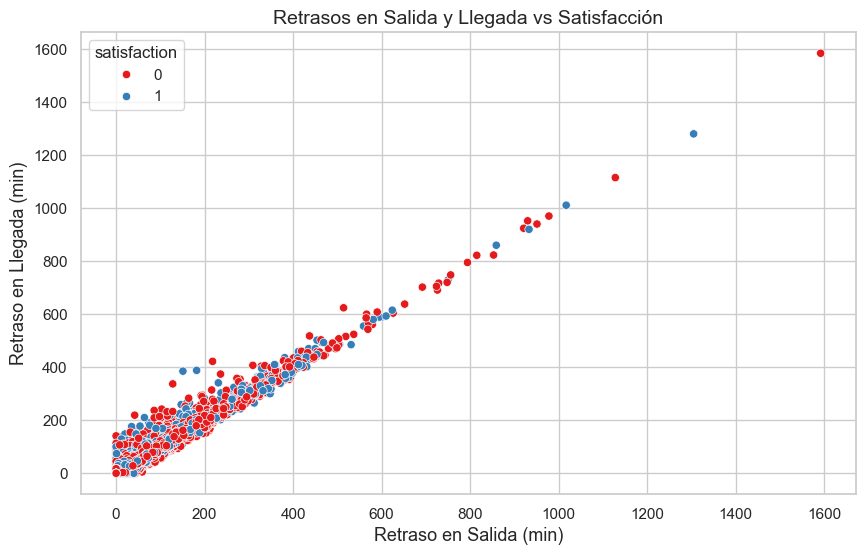

                            Departure Delay in Minutes  \
Departure Delay in Minutes                    1.000000   
Arrival Delay in Minutes                      0.965291   
satisfaction                                 -0.051032   

                            Arrival Delay in Minutes  satisfaction  
Departure Delay in Minutes                  0.965291     -0.051032  
Arrival Delay in Minutes                    1.000000     -0.058275  
satisfaction                               -0.058275      1.000000  


In [96]:
# Convertir la columna 'satisfaction' a valores numéricos
label = LabelEncoder()
# df['satisfaction'] = label.fit_transform(df['satisfaction'])
df['satisfaction'] = label.fit_transform(df['satisfaction'].astype(str))

# Verificar si hay columnas duplicadas
duplicate_columns = df.columns[df.columns.duplicated()]

if duplicate_columns.any():
    print(f"Columnas duplicadas: {duplicate_columns.tolist()}")
else:
    print("No hay columnas duplicadas")

# Eliminar columnas duplicadas
df = df.loc[:, ~df.columns.duplicated()]

# Remover NaNs de las columnas relevantes para el scatterplot y la correlación
df_delay = df[['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']].dropna()

# 8. ¿Cómo afecta el retraso en la salida y llegada la satisfacción del pasajero?, ¿hay una correlación?
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_delay, x='Departure Delay in Minutes', y='Arrival Delay in Minutes', hue='satisfaction', palette='Set1')
plt.title('Retrasos en Salida y Llegada vs Satisfacción', fontsize=14)
plt.xlabel('Retraso en Salida (min)', fontsize=13)
plt.ylabel('Retraso en Llegada (min)', fontsize=13)
plt.show()

# Calcular la correlación
delay_correlation = df_delay.corr()
print(delay_correlation)

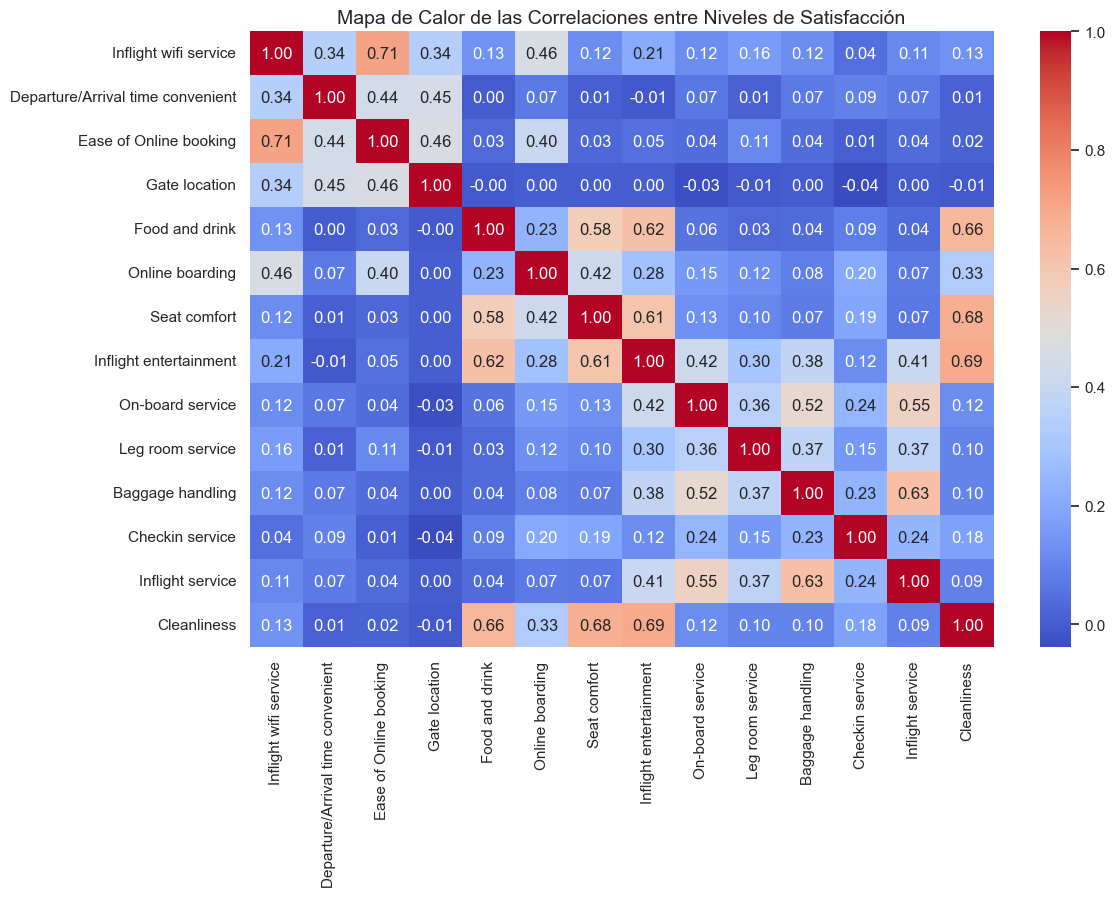

In [97]:
# 9. ¿Existen correlaciones significativas entre diferentes niveles de satisfacción?
satisfaction_levels = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']]
correlation_matrix = satisfaction_levels.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de las Correlaciones entre Niveles de Satisfacción', fontsize=14)
plt.show()

No hay columnas duplicadas


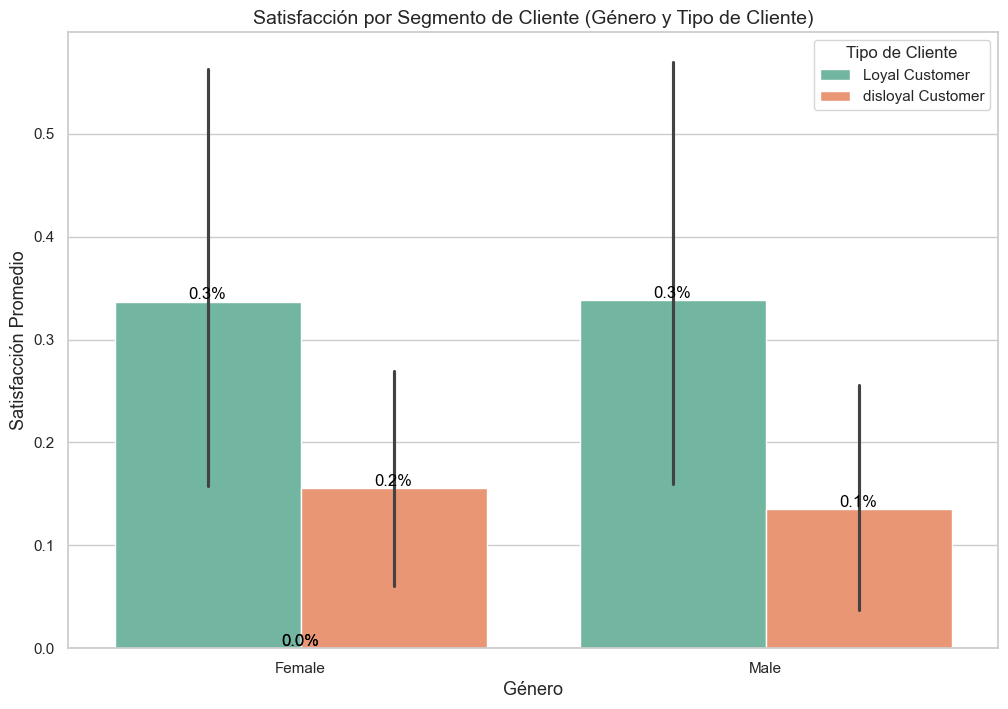

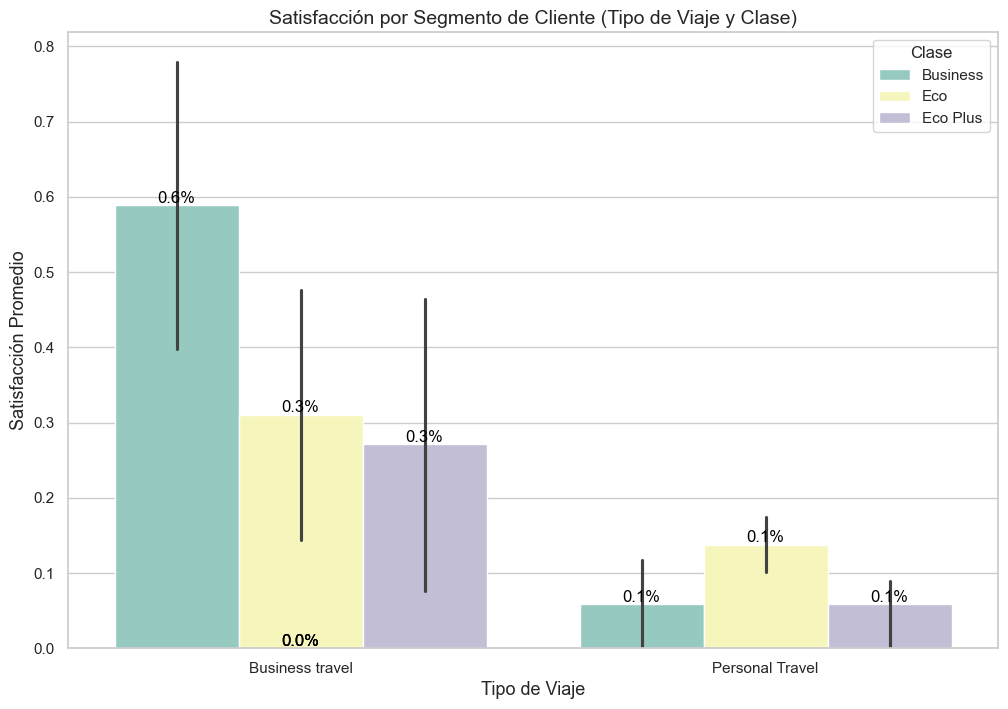

In [98]:
# 10. ¿Qué segmentos de clientes existen en base a demografía, tipo de cliente, tipo de viaje y clase?, ¿cuáles muestran mayores niveles de satisfacción?
# Identificar las columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

segments = df.groupby(['Gender', 'Customer Type', 'Type of Travel', 'Class'])[numeric_cols].mean().reset_index()

# Verificar si hay columnas duplicadas
duplicate_columns = df.columns[df.columns.duplicated()]
if duplicate_columns.any():
    print(f"Columnas duplicadas: {duplicate_columns.tolist()}")
else:
    print("No hay columnas duplicadas")

# Eliminar columnas duplicadas
df = df.loc[:, ~df.columns.duplicated()]


# Graficar la satisfacción por segmentos de cliente
plt.figure(figsize=(12,8))
sns.barplot(x='Gender', y='satisfaction', hue='Customer Type', data=segments, palette="Set2")
plt.title('Satisfacción por Segmento de Cliente (Género y Tipo de Cliente)', fontsize=14)
plt.xlabel('Género', fontsize=13)
plt.ylabel('Satisfacción Promedio', fontsize=13)

# Añadir etiquetas con porcentajes
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                        textcoords='offset points')

plt.legend(title='Tipo de Cliente')
plt.show()

plt.figure(figsize=(12,8))
sns.barplot(x='Type of Travel', y='satisfaction', hue='Class', data=segments, palette="Set3")
plt.title('Satisfacción por Segmento de Cliente (Tipo de Viaje y Clase)', fontsize=14)
plt.xlabel('Tipo de Viaje', fontsize=13)
plt.ylabel('Satisfacción Promedio', fontsize=13)

# Añadir etiquetas con porcentajes
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                        textcoords='offset points')

plt.legend(title='Clase')
plt.show()


## Datos para el Reporte ejecutivo

In [100]:
import pandas as pd

# Cargar los datos
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Combinar los datos de entrenamiento y prueba
df = pd.concat([train_df, test_df], ignore_index=True)

# Descripción general de los datos
total_passengers = df.shape[0]
satisfied_passengers = df[df['satisfaction'] == 'satisfied'].shape[0]
neutral_or_dissatisfied_passengers = df[df['satisfaction'] == 'neutral or dissatisfied'].shape[0]

satisfaction_percentage = satisfied_passengers / total_passengers * 100
neutral_or_dissatisfaction_percentage = neutral_or_dissatisfied_passengers / total_passengers * 100

# Satisfacción por género
satisfaction_by_gender = df.groupby('Gender')['satisfaction'].value_counts(normalize=True).unstack()

# Satisfacción por grupo de edad
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['0-30', '30-50', '50+'])
satisfaction_by_age_group = df.groupby('Age_Group')['satisfaction'].value_counts(normalize=True).unstack()

# Satisfacción por lealtad
satisfaction_by_loyalty = df.groupby('Customer Type')['satisfaction'].value_counts(normalize=True).unstack()

# Satisfacción por tipo de viaje
satisfaction_by_travel_type = df.groupby('Type of Travel')['satisfaction'].value_counts(normalize=True).unstack()

# Análisis de correlación entre servicios y satisfacción
service_columns = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 
                   'Gate location', 'Inflight wifi service', 'Inflight entertainment', 
                   'On-board service', 'Leg room service', 'Baggage handling', 
                   'Checkin service', 'Inflight service', 'Cleanliness']

# Convertir la columna de satisfacción a valores numéricos para calcular la correlación
df['satisfaction_numeric'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

correlation_matrix = df[service_columns + ['satisfaction_numeric']].corr()
service_correlation = correlation_matrix['satisfaction_numeric'].sort_values(ascending=False)

# Imprimir resultados
print(f"Total de encuestas: {total_passengers}")
print(f"Pasajeros satisfechos: {satisfied_passengers} ({satisfaction_percentage:.2f}%)")
print(f"Pasajeros neutrales o insatisfechos: {neutral_or_dissatisfied_passengers} ({neutral_or_dissatisfaction_percentage:.2f}%)")
print("\nSatisfacción por género:")
print(satisfaction_by_gender)
print("\nSatisfacción por grupo de edad:")
print(satisfaction_by_age_group)
print("\nSatisfacción por lealtad:")
print(satisfaction_by_loyalty)
print("\nSatisfacción por tipo de viaje:")
print(satisfaction_by_travel_type)
print("\nCorrelación de servicios con la satisfacción:")
print(service_correlation)

C:\Users\qchuc\AppData\Local\Temp\ipykernel_23824\3589294068.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_by_age_group = df.groupby('Age_Group')['satisfaction'].value_counts(normalize=True).unstack()


Total de encuestas: 129880
Pasajeros satisfechos: 56428 (43.45%)
Pasajeros neutrales o insatisfechos: 73452 (56.55%)

Satisfacción por género:
satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                       0.571025   0.428975
Male                         0.559885   0.440115

Satisfacción por grupo de edad:
satisfaction  neutral or dissatisfied  satisfied
Age_Group                                       
0-30                         0.692417   0.307583
30-50                        0.489855   0.510145
50+                          0.535950   0.464050

Satisfacción por lealtad:
satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                    0.521885   0.478115
disloyal Customer                 0.760303   0.239697

Satisfacción por tipo de viaje:
satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Bus